In [1]:
import pandas as  pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import chardet 

In [2]:
# importing the csv file 
df = pd.read_csv("jira_sfdc_prev.csv")
df

,POSID,JIRA KEY,ENGAGEMENT TYPE,USE CASE1,USE CASE2,USE CASE3,ASSIGNEE,JIRA CREATED,JIRA STATUS,JIRA RESOLVED,...,TECH WIN METHOD,AMOUNT,STAGE,OPP CLOSE,OPP USE CASE,PHYSICAL SOLUTION,CLOUD SOLUTION,REASON LOST,ACCOUNT,TOOLS USED
0,POS0137724,SOL-2170,Validation,Get reliable data access for tools,NaN,NaN,NaN,nbodla,2/2/22 16:26,Done,...,NaN,100000.00,4 - Value Demonstration,8/11/23,NPM/APM; Cloud NPM/APM,DeDupe; Tunneling; AFI/AMI; FM,NaN,NaN,"Five 9,",NaN
1,POS0122398,SOL-2284,Validation,Get reliable data access for tools,NaN,NaN,NaN,nbodla,3/30/22 19:32,Done,...,No POC Required,369795.08,2 - Discover,9/21/23,NPM/APM; OOB Security,NaN,NaN,NaN,Select Medical Holdings,Forcepoint; ForeScout; NetScout (Fluke); Trend...
2,POS0145774,SOL-2444,Validation,Visibility in private clouds,NaN,NaN,NaN,sprakash,6/23/22 3:54,Done,...,NaN,36180.00,8 - Booked,9/21/22,Cloud Security,NaN,VMWare,NaN,Alcohol and Tobacco Tax and Trade Bureau,NaN
3,POS0106650,SOL-2491,Validation,Subscriber-Aware Visibility,NaN,NaN,NaN,authirapathi,7/14/22 21:49,Done,...,Onsite,2500000.00,Lost,8/24/22,NaN,NaN,NaN,Company Strategy,"T-Mobile,",NaN
4,POS0150030,SOL-2609,Validation,Subscriber-Aware Visibility,NaN,NaN,NaN,frosell,9/6/22 11:17,Done,...,NaN,13000039.27,8 - Booked,12/22/22,NaN,NaN,NaN,NaN,"T-Mobile,",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,POS0097744,SOL-2469,Automation,Visibility in public clouds,NaN,NaN,NaN,sriramk,7/5/22 13:02,Done,...,NaN,157140.01,2 - Discover,9/30/23,NaN,NaN,NaN,NaN,TOTAL SA,NaN
160,POS0145884,SOL-2632,Automation,Inline bypass,NaN,NaN,NaN,sriramk,9/16/22 13:11,Done,...,Onsite,111390.88,8 - Booked,1/11/23,NPM/APM; Inline Security,Tap & Agg; SSL/TLS; FM; Inline Bypass,NaN,NaN,E.Sun bank - ????,Imperva (SecureSphere); NetScout (Fluke)
161,POS0154703,SOL-2633,Automation,Get reliable data access for tools,NaN,NaN,NaN,sriramk,9/16/22 13:18,Done,...,NaN,1800000.00,5 - Negotiation,11/30/23,OOB Security,Header Stripping,NaN,NaN,Cox Communications,Procera
162,POS0140741,SOL-2821,Automation,Visibility in public clouds,NaN,NaN,NaN,sriramk,1/25/23 17:23,Done,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Analyzing the reason lost column

# First will examine the top reasons why deal was lost
lost = df['REASON LOST'].value_counts()
lost_df = pd.DataFrame(lost)

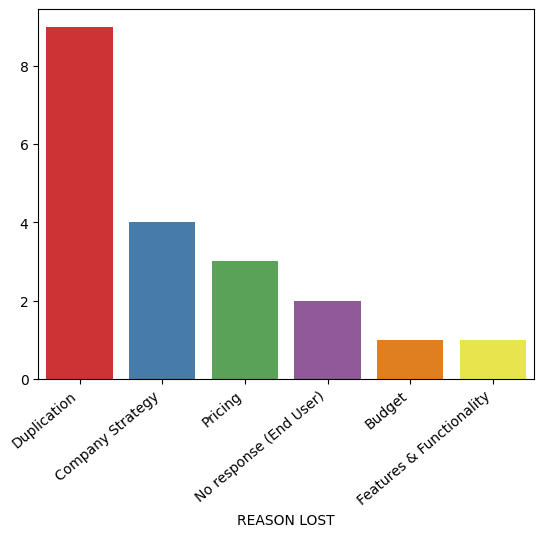

<Figure size 800x400 with 0 Axes>

In [4]:
ax = sns.barplot(x = lost.index, y = lost.values, palette = 'Set1')
plt.figure(figsize=(8,4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()


Duplication has resulted in the highest numnber of deals lost

In [66]:
# Top Use Case Table 
use_case = df[["REASON LOST","USE CASE1"]].dropna(axis = 0)
use_case_lost = use_case["USE CASE1"].value_counts()
pd.DataFrame(use_case_lost)

,count
USE CASE1,
Get reliable data access for tools,6
Application Filtering Intelligence,5
Extract network metadata,3
Encrypted traffic management,3
Subscriber-Aware Visibility,1
Visibility in public clouds,1
Centralized NetFlow/IPFIX,1


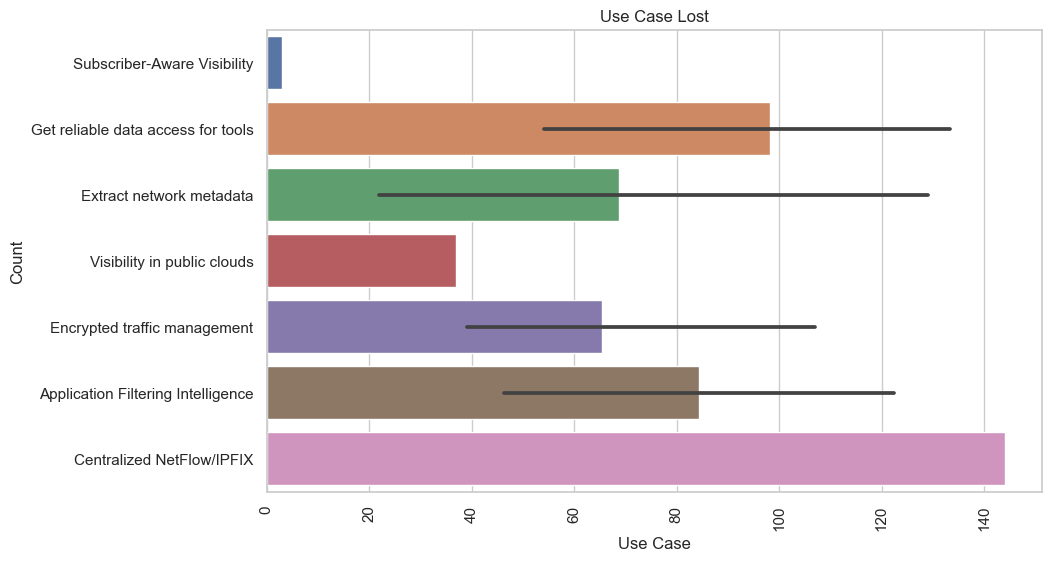

In [65]:
# Plotting the bar chart for top use cases 
plt.figure(figsize=(10, 6))
sns.barplot(x=use_case.index, y=use_case["USE CASE1"])
plt.xlabel("Use Case")
plt.ylabel("Count")
plt.title("Use Case Lost")
plt.xticks(rotation=90)
plt.show()

In [67]:
#
grouped = use_case.groupby(['REASON LOST', 'USE CASE1']).size().reset_index(name='Count')
grouped_sorted = grouped.sort_values("Count", ascending = False)

Asides from the use case of 'Getting reliable data access for tools' and Duplication, the type of use case seems to not be associated with any particular reason lost

In [60]:
# this table shows the customers and associated reason's why the deals were lost
loss = pd.DataFrame(acct_lost.groupby(["ACCOUNT", "REASON LOST"]).size())
loss.sort_values(0, ascending = False)

,,0
ACCOUNT,REASON LOST,
"T-Mobile,",Duplication,2
Electric Reliability Council of Texas - ERCOT,Pricing,2
Adobe Systems India Private Limited,Features & Functionality,1
Veterans Affairs (VA) - AITC & CDM,No response (End User),1
US Social Security Administration - SSA,Duplication,1
US Federal - D,Duplication,1
Total Quality Logistics,Duplication,1
"The PNC Financial Services Group,",Duplication,1
"T-Mobile,z - Not on list (pls update SFDC Team)",Duplication,1


In [10]:
cust_engagement = df[["ENGAGEMENT TYPE", "AMOUNT", "USE CASE1", "ACCOUNT"]]
cust_engagement

,ENGAGEMENT TYPE,AMOUNT,USE CASE1,ACCOUNT
0,Validation,100000.00,Get reliable data access for tools,"Five 9,"
1,Validation,369795.08,Get reliable data access for tools,Select Medical Holdings
2,Validation,36180.00,Visibility in private clouds,Alcohol and Tobacco Tax and Trade Bureau
3,Validation,2500000.00,Subscriber-Aware Visibility,"T-Mobile,"
4,Validation,13000039.27,Subscriber-Aware Visibility,"T-Mobile,"
...,...,...,...,...
159,Automation,157140.01,Visibility in public clouds,TOTAL SA
160,Automation,111390.88,Inline bypass,E.Sun bank - ????
161,Automation,1800000.00,Get reliable data access for tools,Cox Communications
162,Automation,NaN,Visibility in public clouds,NaN


In [11]:
cust = cust_engagement[["ENGAGEMENT TYPE", "AMOUNT"]]
cust = cust.groupby('ENGAGEMENT TYPE').mean()
cust["AMOUNT"] = cust['AMOUNT'].astype('int')
cust.sort_values("AMOUNT", ascending = False)

,AMOUNT
ENGAGEMENT TYPE,
Validation,1364506
Demo,1141652
Sizing,1097148
POC,692368
Automation,522793
Design Review,448464
Post-Sales,102072


We see that validation is the engagement type that contributes the highest amount, by far; whearas Post-Sales is the lease

In [13]:
customer_amounts = cust_engagement[["AMOUNT", "ACCOUNT"]].groupby('ACCOUNT').mean()
# converting to type int

customer_amounts["AMOUNT"] = customer_amounts["AMOUNT"].dropna(axis = 0).astype('int')
customer_amounts

,AMOUNT
ACCOUNT,
Cascade,271828.0
"DS5150)""",22641.0
Iron Port,626568.0
ANDORRA TELECOM SAU,364926.0
ASIAN DEVELOPMENT BANK,17520.0
...,...
Vodafone Group Services Ltd. (UK),100000.0
Wells Fargo Bank (Global Acct),1635515.0
"World Wrestling Entertainment,LiveAction",113258.0


In [14]:
# this table shows the accounts with the largest deal sizes 
customer_amounts = customer_amounts.sort_values("AMOUNT", ascending = False)
customer_amounts.dropna()

,AMOUNT
ACCOUNT,
Veterans Affairs (VA) - AITC & CDM,24611599.0
"T-Mobile,",4900009.0
USMC - Marine Corps Systems Command - MCSC,4558776.0
"T-Mobile,z - Not on list (pls update SFDC Team)",4199778.0
NTT Communications India Network Services Private Limited,3976927.0
...,...
ASIAN DEVELOPMENT BANK,17520.0
Ferretti S.p.A.,12870.0
AXA Insurance UK PLC,12285.0


In [15]:
# top ten customer accounts, by amounts
top_accounts = customer_amounts.head(10)
top_accounts

,AMOUNT
ACCOUNT,
Veterans Affairs (VA) - AITC & CDM,24611599.0
"T-Mobile,",4900009.0
USMC - Marine Corps Systems Command - MCSC,4558776.0
"T-Mobile,z - Not on list (pls update SFDC Team)",4199778.0
NTT Communications India Network Services Private Limited,3976927.0
MUFG N.A.,2677997.0
Wells Fargo Bank (Global Acct),1635515.0
"Charter Communications,Infovista; NetScout (Fluke)",1595523.0
ETISALAT EGYPT,1497088.0


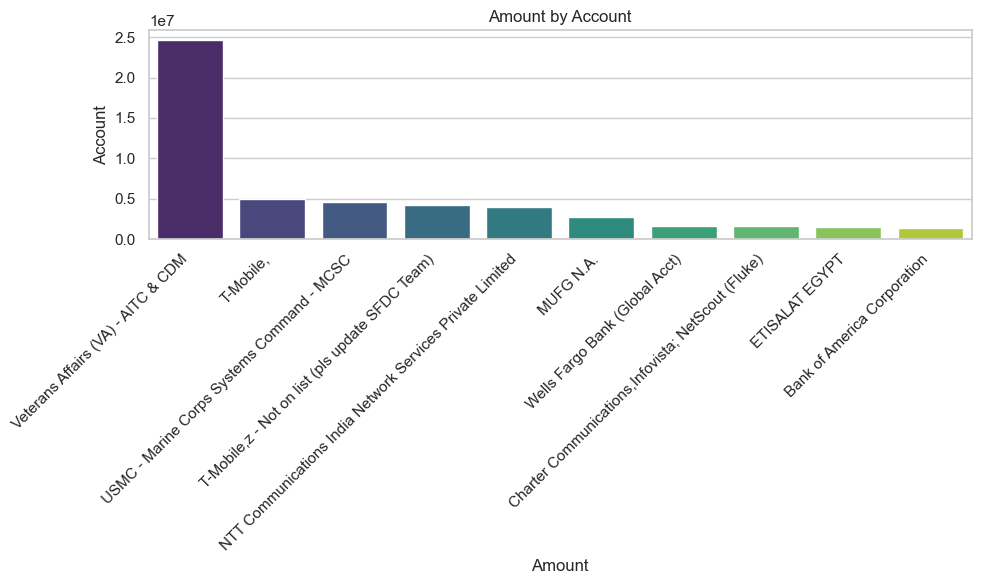

In [16]:

sns.set(style='whitegrid')
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.barplot(x=top_accounts.index, y='AMOUNT', data=top_accounts, palette='viridis')

plt.title('Amount by Account')
plt.xlabel('Amount')
plt.ylabel('Account')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')
    
plt.tight_layout()
plt.show()

In [17]:
# Use Case by Amount
use_case = df[["USE CASE1", "AMOUNT"]].groupby('USE CASE1').mean()

use_case["AMOUNT"] = use_case["AMOUNT"].dropna(axis = 0).astype('int')

use_case.sort_values("AMOUNT", ascending = False)



,AMOUNT
USE CASE1,
Subscriber-Aware Visibility,4003986
Extract network metadata,2711449
Centralized NetFlow/IPFIX,1495907
Visibility into remote sites,836415
Inline bypass,815438
Application Filtering Intelligence,718882
Get reliable data access for tools,562521
Encrypted traffic management,494230
Visibility in private clouds,165979


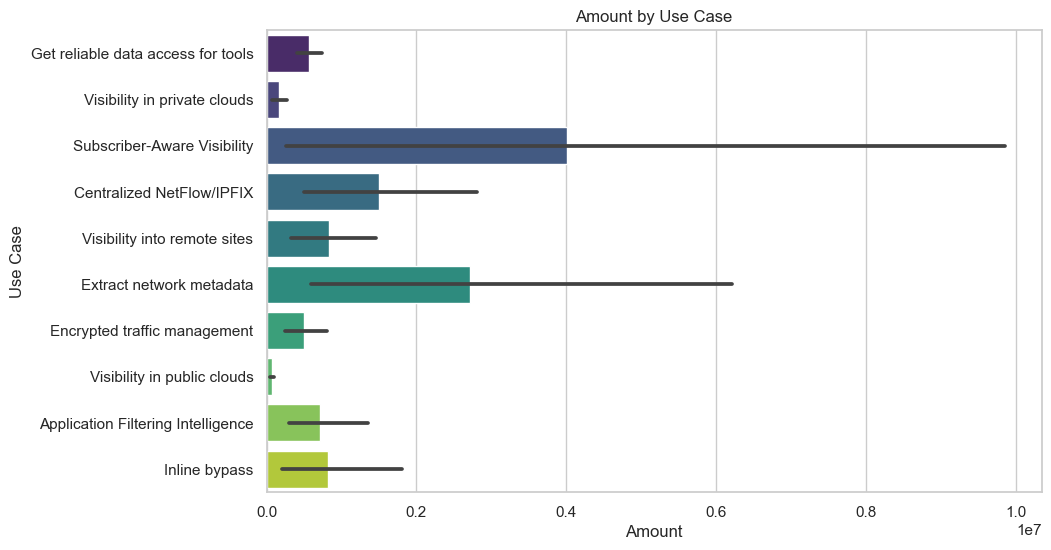

In [18]:


plt.figure(figsize=(10, 6))
sns.barplot(x='AMOUNT', y='USE CASE1', data=df, palette='viridis')

plt.title('Amount by Use Case')
plt.xlabel('Amount')
plt.ylabel('Use Case')

plt.show()


In [42]:
df[["TECH WIN STATUS", "OPP USE CASE"]]

,TECH WIN STATUS,OPP USE CASE
0,Technical Win,NPM/APM; Cloud NPM/APM
1,Technical Win,NPM/APM; OOB Security
2,Technical Win,Cloud Security
3,In Progress,NaN
4,Expansion,NaN
...,...,...
159,NaN,NaN
160,Technical Win,NPM/APM; Inline Security
161,Technical Win,OOB Security
162,NaN,NaN


In [21]:
# top physical tools used 
physical = df.groupby(["PHYSICAL SOLUTION"]).size()
physical = pd.DataFrame(physical)
physical = physical.sort_values(by=0, ascending=False)
physical

,0
PHYSICAL SOLUTION,
AFI/AMI,8
Tap & Agg; DeDupe,7
Tap & Agg,6
Tap & Agg; SSL/TLS; FM; Inline Bypass,5
Tap & Agg; DeDupe; NetFlow,4
Tap & Agg; DeDupe; Header Stripping,3
Tap & Agg; DeDupe; APF; NetFlow,3
SSL/TLS; Inline Bypass,2
Tap & Agg; Header Stripping,2


In [22]:
# top cloud tools used 

cloud_tools = df.groupby(["CLOUD SOLUTION"]).size()
cloud_tools = pd.DataFrame(cloud_tools)
cloud_tools.sort_values(by=0, ascending=False)

,0
CLOUD SOLUTION,
VMWare,21
AWS,11
Azure,11
Nutanix,2


In [29]:
# top tools used
tools = df.groupby(["TOOLS USED"]).size()
tools = pd.DataFrame(tools)
tools = tools.sort_values(by=0, ascending=False)
tools.rename(columns={'0': 'count'}, inplace=True)
tools

,0
TOOLS USED,
Cisco Security (Cisco Secure,11
z - no tool vendor in opportunity,6
RiverBed (Wireshark,6
Splunk,6
NetScout (Fluke),4
LiveAction,3
Procera,3
Viavi GigaStor (Network Instruments),2
EMC; F5 (BigIP); Oracle; Palo Alto Networks,2
